# One layer model

Here we show how to run our two-layer model as a single-layer model. Put simply, we make the deep ocean component of the two-layer model infinitely deep and we have a single layer model. The concept is described by Equation 4 of [Geoffroy et al. 2013, Part 1](https://journals.ametsoc.org/doi/10.1175/JCLI-D-12-00195.1).

In [1]:
# NBVAL_IGNORE_OUTPUT
import os.path

import numpy as np
import pandas as pd
import openscm_units.unit_registry as ur
import tqdm.autonotebook as tqdman
from scmdata import ScmRun, run_append

from openscm_twolayermodel import TwoLayerModel

import matplotlib.pyplot as plt

<ipython-input-1-c16e6c863969>:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


For this we use RCMIP effective radiative forcing data.

In [2]:
DATA_PATH = os.path.join(
    "..",
    "tests",
    "test-data",
    "rcmip-radiative-forcing-annual-means-v4-0-0.csv",
)
DATA_PATH

'../tests/test-data/rcmip-radiative-forcing-annual-means-v4-0-0.csv'

In [3]:
# NBVAL_IGNORE_OUTPUT
scenarios = ScmRun(DATA_PATH, lowercase_cols=True).filter(scenario="historical", keep=False)
scenarios

<scmdata.ScmRun (timeseries: 480, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	        activity_id mip_era        model region          scenario   unit  \
	0    not_applicable   CMIP5          AIM  World             rcp60  W/m^2   
	1    not_applicable   CMIP5          AIM  World             rcp60  W/m^2   
	2    not_applicable   CMIP5          AIM  World             rcp60  W/m^2   
	3    not_applicable   CMIP5          AIM  World             rcp60  W/m^2   
	4    not_applicable   CMIP5          AIM  World             rcp60  W/m^2   
	..              ...     ...          ...    ...               ...    ...   
	494  not_applicable   CMIP5  unspecified  World  historical-cmip5  W/m^2   
	495  not_applicable   CMIP5  unspecified  World  historical-cmip5  W/m^2   
	496  not_applicable   CMIP5  unspecified  World  historical-cmip5  W/m^2   
	497  not_applicable   CMIP5  unspecified  World  historical-cmip5  W/m^2   
	498  not_applicable   CMIP5  unspe

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

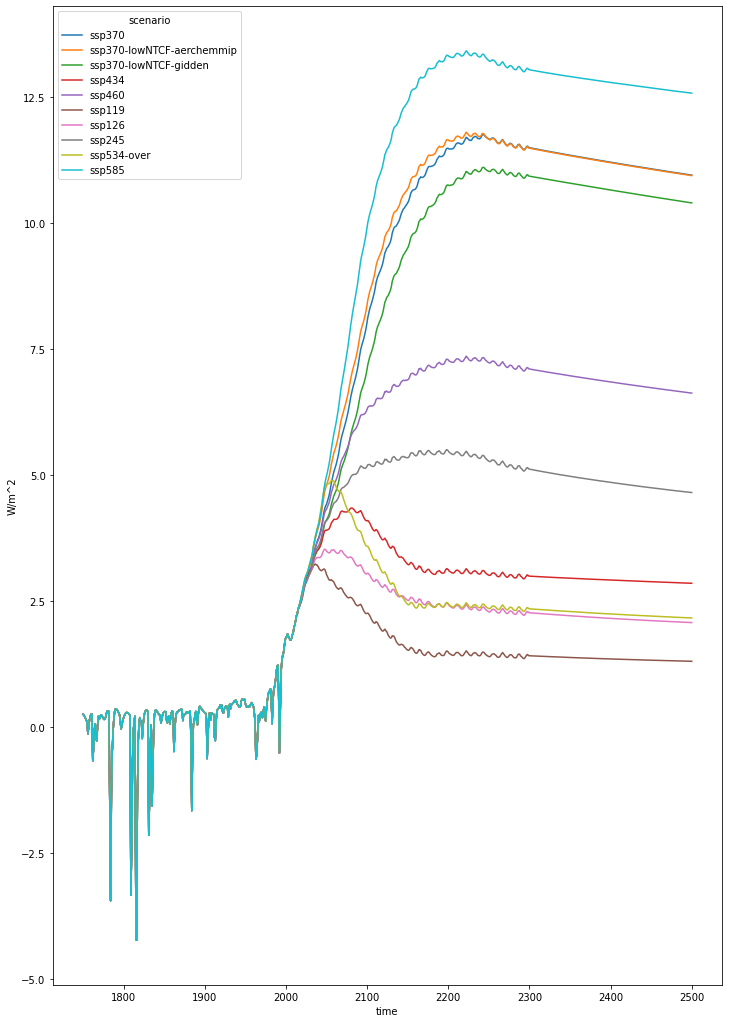

In [4]:
# NBVAL_IGNORE_OUTPUT
fig = plt.figure(figsize=(12, 18))
ax = fig.add_subplot(111)
scenarios.filter(variable="Effective Radiative Forcing").lineplot()

In [5]:
# NBVAL_IGNORE_OUTPUT
dl_values = np.array([100, 2000, 10000, 10**15]) * ur("m")
dl_values

Magnitude,[ 100 2000 10000 1000000000000000]
Units,meter


In [6]:
# NBVAL_IGNORE_OUTPUT
runner = TwoLayerModel()
output = []
equivalent_parameters = []
for dl in tqdman.tqdm(dl_values, desc="Parameter settings"):
    runner.dl = dl
    output.append(runner.run_scenarios(scenarios))
    equivalent_parameters.append(({"two-layer deep ocean depth": runner.dl}, runner.get_impulse_response_parameters()))

output = run_append(output)
output

<scmdata.ScmRun (timeseries: 160, timepoints: 751)>
Time:
	Start: 1750-01-01T00:00:00
	End: 2500-01-01T00:00:00
Meta:
	     a (watt / delta_degree_Celsius ** 2 / meter ** 2)     activity_id  \
	0                                                  0.0  not_applicable   
	1                                                  0.0  not_applicable   
	2                                                  0.0  not_applicable   
	3                                                  0.0  not_applicable   
	4                                                  0.0  not_applicable   
	..                                                 ...             ...   
	155                                                0.0  not_applicable   
	156                                                0.0  not_applicable   
	157                                                0.0  not_applicable   
	158                                                0.0  not_applicable   
	159                                                0.0  

As we can see in the plots below, as the deep ocean becomes bigger, it can uptake more heat and hence warming is reduced. Related to this, we also see that the deeper the deep ocean is, the longer the equilibration time (but the harder it is to see on the time axis we have). This is because the slow timescale becomes too long for us to see it i.e. we effectively have only one timescale in the model (as discussed in [Geoffroy et al. 2013, Part 1](https://journals.ametsoc.org/doi/10.1175/JCLI-D-12-00195.1)). This is clear if we look at the slow-timescale in the equivalent two-timescale response parameters. As the deep ocean becomes bigger and bigger, the slow-timescale grows from hundreds to thousands to billions of years.

In [7]:
for v in equivalent_parameters:
    v[1]["d1"] = v[1]["d1"].to("yr")
    v[1]["d2"] = v[1]["d2"].to("yr")
    
equivalent_parameters

[({'two-layer deep ocean depth': 100 <Unit('meter')>},
  {'d1': 2.980911326367698 <Unit('a')>,
   'd2': 29.521132470568794 <Unit('a')>,
   'q1': 0.4104377535043735 <Unit('delta_degree_Celsius * meter ** 2 / watt')>,
   'q2': 0.3917012839287813 <Unit('delta_degree_Celsius * meter ** 2 / watt')>,
   'efficacy': 1.0 <Unit('dimensionless')>}),
 ({'two-layer deep ocean depth': 2000 <Unit('meter')>},
  {'d1': 3.224285795910259 <Unit('a')>,
   'd2': 545.8565630896654 <Unit('a')>,
   'q1': 0.4848549694209551 <Unit('delta_degree_Celsius * meter ** 2 / watt')>,
   'q2': 0.31728406801220327 <Unit('delta_degree_Celsius * meter ** 2 / watt')>,
   'efficacy': 1.0 <Unit('dimensionless')>}),
 ({'two-layer deep ocean depth': 10000 <Unit('meter')>},
  {'d1': 3.2342013046041056 <Unit('a')>,
   'd2': 2720.915300585768 <Unit('a')>,
   'q1': 0.4878523568580023 <Unit('delta_degree_Celsius * meter ** 2 / watt')>,
   'q2': 0.3142866805751838 <Unit('delta_degree_Celsius * meter ** 2 / watt')>,
   'efficacy': 1.

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

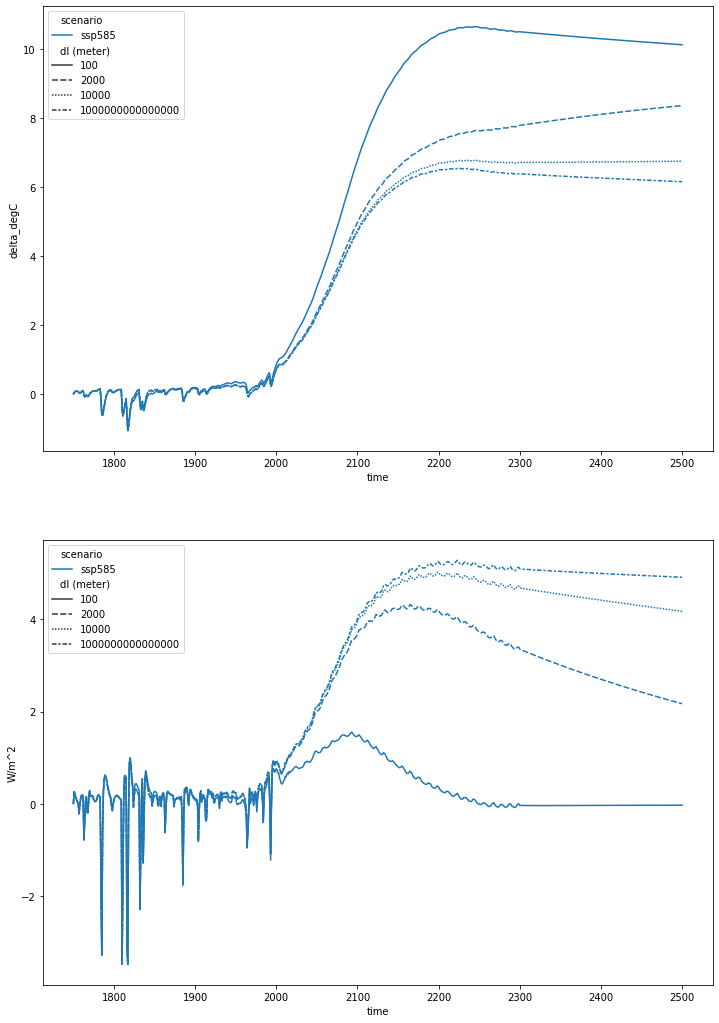

In [8]:
# NBVAL_IGNORE_OUTPUT
pkwargs = dict(
    hue="scenario", style="dl (meter)",
)
fig = plt.figure(figsize=(12, 18))

ax = fig.add_subplot(211)
output.filter(scenario="ssp585", variable="Surface Temperature|Upper").lineplot(**pkwargs, ax=ax)

ax = fig.add_subplot(212)
output.filter(scenario="ssp585", variable="Heat Uptake").lineplot(**pkwargs, ax=ax)